Importação de bibliotecas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Armazenamento de cada DataFrame em variáveis

In [5]:
calendar_df = pd.read_csv('/content/AdventureWorks_Calendar.csv', encoding='latin-1')
customers_df = pd.read_csv('/content/AdventureWorks_Customers.csv', encoding='latin-1')
product_categories_df = pd.read_csv('/content/AdventureWorks_Product_Categories.csv', encoding='latin-1')
product_subcategories_df = pd.read_csv('/content/AdventureWorks_Product_Subcategories.csv', encoding='latin-1')
products_df = pd.read_csv('/content/AdventureWorks_Products.csv', encoding='latin-1')
returns_df = pd.read_csv('/content/AdventureWorks_Returns.csv', encoding='latin-1')
sales_2015_df = pd.read_csv('/content/AdventureWorks_Sales_2015.csv', encoding='latin-1')
sales_2016_df = pd.read_csv('/content/AdventureWorks_Sales_2016.csv', encoding='latin-1')
sales_2017_df = pd.read_csv('/content/AdventureWorks_Sales_2017.csv', encoding='latin-1')
territories_df = pd.read_csv('/content/AdventureWorks_Territories.csv', encoding='latin-1')

Concatenação dos três DataFrames referentes a vendas

In [6]:
sales_df = pd.concat([sales_2015_df, sales_2016_df, sales_2017_df], ignore_index=True)

Merge de DataFrames

In [7]:
merged_df = products_df.merge(product_subcategories_df, on='ProductSubcategoryKey')
merged_df = merged_df.merge(product_categories_df, on='ProductCategoryKey')

In [8]:
sales_df = sales_df.merge(products_df, on='ProductKey')
sales_df = sales_df.merge(customers_df, on='CustomerKey')

In [9]:
sales_df = sales_df.merge(calendar_df, left_on='OrderDate', right_on='Date')

In [10]:
products_df = products_df.merge(product_subcategories_df, on='ProductSubcategoryKey')
products_df = products_df.merge(product_categories_df, on='ProductCategoryKey')

In [11]:
merged_df = products_df.merge(product_categories_df, on='ProductCategoryKey', how='left')
merged_df = merged_df.merge(product_subcategories_df, on='ProductSubcategoryKey')

In [12]:
sales_df = sales_df.merge(calendar_df, left_on='OrderDate', right_on='Date')

Informações relevantes sobre os dataframes após merges

In [13]:
print("Customers Data:")
print(customers_df.info())
print()
print("Product Categories Data:")
print(product_categories_df.info())
print()
print("Product Subcategories Data:")
print(product_subcategories_df.info())
print()
print("Products Data:")
print(products_df.info())
print()
print("Returns Data:")
print(returns_df.info())
print()
print("Sales 2015 Data:")
print(sales_2015_df.info())
print()
print("Sales 2016 Data:")
print(sales_2016_df.info())
print()
print("Sales 2017 Data:")
print(sales_2017_df.info())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   Prefix          18018 non-null  object
 2   FirstName       18148 non-null  object
 3   LastName        18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18018 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  object
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB
None

Product Categories Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column              Non-Null

In [14]:
print(products_df.columns)
print(product_subcategories_df.columns)
print(product_categories_df.columns)

Index(['ProductKey', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice', 'SubcategoryName',
       'ProductCategoryKey', 'CategoryName'],
      dtype='object')
Index(['ProductSubcategoryKey', 'SubcategoryName', 'ProductCategoryKey'], dtype='object')
Index(['ProductCategoryKey', 'CategoryName'], dtype='object')


Criação de gráficos usando a biblioteca matplotlib

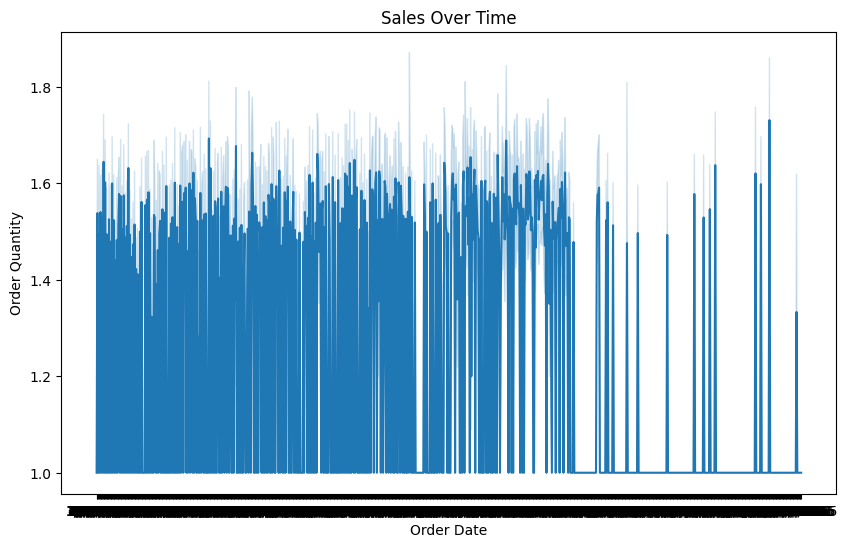

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x='OrderDate', y='OrderQuantity', data=sales_df)
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.show()

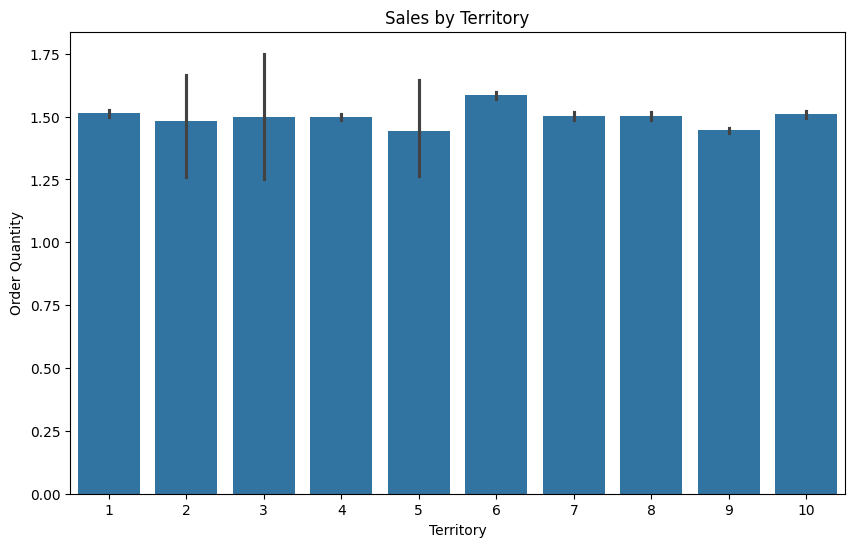

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='TerritoryKey', y='OrderQuantity', data=sales_df)
plt.title('Sales by Territory')
plt.xlabel('Territory')
plt.ylabel('Order Quantity')
plt.show()

Tratamento de dados

Transformação de valores de data para datetime

In [18]:
# sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])
sales_df['StockDate'] = pd.to_datetime(sales_df['StockDate'])

Separação de colunas de datetime, colunas numéricas e colunas de objetos

In [19]:
datetime_cols = sales_df.select_dtypes(include=['datetime64']).columns
numerical_cols = sales_df.select_dtypes(include=['int64', 'float64']).columns
object_cols = sales_df.select_dtypes(include=['object']).columns

sales_df_datetime = sales_df[datetime_cols]
sales_df_numerical = sales_df[numerical_cols]
sales_df_object = sales_df[object_cols]

Pré-processamento usando padronização

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sales_df_numerical_scaled = pd.DataFrame(scaler.fit_transform(sales_df_numerical), columns=numerical_cols)

In [21]:
import numpy as np

sales_df_processed = pd.concat([sales_df[datetime_cols], sales_df_numerical_scaled, sales_df[object_cols]], axis=1)

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
sales_df_numerical_imputed = imputer.fit_transform(sales_df_numerical)
sales_df_numerical_imputed = pd.DataFrame(sales_df_numerical_imputed, columns=numerical_cols)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df.select_dtypes(include=['number']))

In [24]:
from scipy.stats import boxcox

sales_df_transformed = sales_df.copy()
for col in sales_df_transformed.select_dtypes(include=['number']):
    sales_df_transformed[col] = np.where(sales_df_transformed[col] <= 0, 1e-6, sales_df_transformed[col])
    sales_df_transformed[col] = boxcox(sales_df_transformed[col])[0]

Criação de features úteis (e algumas não utilizadas)

In [25]:
sales_df['OrderNumber_Numeric'] = sales_df['OrderNumber'].str.extract('(\d+)', expand=False).astype(float)
sales_df['Moving_Avg_3_Months'] = sales_df['OrderNumber_Numeric'].rolling(window=3).mean()

In [26]:
sales_df['Moving_Avg_3_Months'] = sales_df['OrderNumber_Numeric'].rolling(window=3).mean()

In [27]:
sales_df['Pct_Change'] = sales_df['OrderNumber_Numeric'].pct_change()

In [28]:
sales_df['Seasonality_Adjusted'] = sales_df['OrderNumber_Numeric'] / sales_df['OrderNumber_Numeric'].rolling(window=12).mean()

In [29]:
weather_df = pd.read_csv('weather_data.csv')
weather_df = pd.to_datetime(weather_df['Date'])

Modelagem e implementação do modelo de machine learning usando regressão linear

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [31]:
X = sales_df['Moving_Avg_3_Months'].values.reshape(-1, 1)
y = sales_df['OrderNumber_Numeric'].values

In [32]:
X_imputed = imputer.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Erro médio quadrático: {mse.round()}')

last_moving_avg = sales_df['Moving_Avg_3_Months'].iloc[-1]
new_data = np.array([last_moving_avg]).reshape(-1, 1)

prospeccao = model.predict(new_data)

print(f'Prospecção para o próximo mês: {prospeccao[0].round()}')

Erro médio quadrático: 1114308.0
Prospecção para o próximo mês: 49190.0


Para entendimento da precisão do modelo

In [39]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1055.607759488101


In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9802581790853302


In [37]:
print(model.coef_)

[0.99733872]


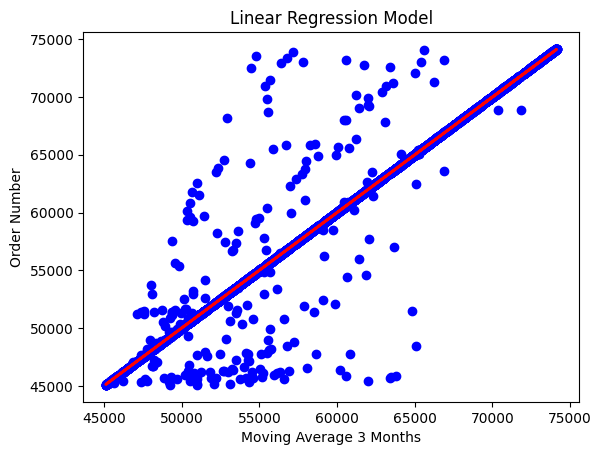

In [36]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Moving Average 3 Months')
plt.ylabel('Order Number')
plt.title('Linear Regression Model')
plt.show()